# **Sistema de Recomendação Baseado em Reviews da Amazon**

## **Introdução**
Este projeto tem como objetivo criar um sistema de recomendação utilizando uma base de dados de reviews de produtos da Amazon. A ideia é desenvolver um modelo eficiente que analise padrões nos dados e forneça recomendações personalizadas para os usuários, ao mesmo tempo documentando e comparando o impacto de diferentes ferramentas de LLM no desenvolvimento.

---

## **1. Configuração e Pré-processamento**
Nesta etapa, realizamos a preparação dos dados para garantir que estejam limpos e prontos para análise e modelagem:
- **Importação e Limpeza:**
  - Processar o arquivo CSV fornecido.
  - Corrigir valores ausentes, duplicados e inconsistências nos dados.
  - Formatar colunas como preços e avaliações para análises mais precisas.
- **Análise Exploratória de Dados (EDA):**
  - Explorar padrões gerais nos dados, como categorias populares, distribuições de avaliações e comportamento dos usuários.

---

## **2. Desenvolvimento do Sistema de Recomendação**
O sistema de recomendação será baseado em duas abordagens principais:
### **Filtragem Baseada em Conteúdo**
- Utilizar informações textuais das colunas:
  - `about_product`
  - `review_content`
  - `category`
- Empregar a técnica de vetorização TF-IDF para calcular similaridades entre produtos e recomendar itens com base nos interesses do usuário.

### **Filtragem Colaborativa**
- Basear-se nas interações entre usuários e produtos:
  - `user_id`
  - `product_id`
- Implementar modelos de fatoração matricial para recomendações personalizadas com base no histórico de interações dos usuários.

---

## **Objetivo Final**
- Criar um sistema de recomendação funcional e eficiente.
- Comparar o impacto de diferentes assistentes LLM (como ChatGPT 4io e X) durante o desenvolvimento.
- Fornecer um relatório detalhado com análises, aprendizados e observações sobre o projeto.

---

## **Ferramentas e Bibliotecas Utilizadas**
- **Manipulação de Dados:** `pandas`, `numpy`.
- **Análise Textual:** `nltk`, `spacy`, `scikit-learn` (TF-IDF).
- **Sistemas de Recomendação:** `scikit-learn`, `surprise`.
- **Visualização:** `matplotlib`, `seaborn`.
- **LLMs:** OpenAI  (ChatGPT), X.

---

> *Nota:* Este projeto está sendo desenvolvido como parte de um mini-projeto acadêmico, onde a interação com assistentes LLM é um dos pontos centrais para análise comparativa.


## **1. Configuração e Pré-processamento**

Nesta etapa, realizamos as seguintes tarefas para preparar os dados para análise e modelagem:

### **1.1 Importação dos Dados**
- Carregamento do arquivo CSV contendo informações sobre os produtos e reviews.
- Visualização inicial para compreender a estrutura e as principais características do dataset.

### **1.2 Limpeza dos Dados**
- Remoção de valores ausentes e duplicados.
- Conversão de colunas de texto e numéricas para os formatos apropriados.
- Padronização dos preços, removendo caracteres como "₹" e convertendo para formato numérico.

### **1.3 Análise Exploratória de Dados (EDA)**
- Distribuição de avaliações por produto (`rating`).
- Análise das categorias mais frequentes nos dados.
- Verificação da densidade de reviews por produto e por usuário.
- Identificação de outliers, como produtos com avaliações muito baixas ou muito altas.

Os insights obtidos aqui guiarão o desenvolvimento do sistema de recomendação.


#### **1.1 Importação dos Dados**

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:

# Configuração de estilo para os gráficos
plt.style.use('ggplot')

# **1.1 Importação dos Dados**
# Carregar o arquivo CSV
data = pd.read_csv('amazon.csv')

# Exibir as primeiras linhas do dataset
print("Visualização inicial dos dados:")
display(data.head())

# Verificar informações gerais do dataset
print("\nInformações gerais sobre o dataset:")
data.info()


Visualização inicial dos dados:


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...



Informações gerais sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link      

In [31]:
data.nunique()

product_id          1349
product_name        1335
category             211
discounted_price     550
user_id             1192
actual_price         449
rating                25
rating_count        1143
about_product       1291
review_content      1210
dtype: int64

#### **1.2 Limpeza dos Dados**

In [29]:
# Remover valores duplicados
initial_shape = data.shape
data.drop_duplicates(inplace=True)
print(f"Linhas removidas (duplicados): {initial_shape[0] - data.shape[0]}")

# Remover valores ausentes
missing_values = data.isnull().sum().sum()
data.dropna(inplace=True)
print(f"Valores ausentes removidos: {missing_values}")

# Padronizar a coluna de preços, removendo símbolos e convertendo para numérico
data['discounted_price'] = data['discounted_price'].replace('₹', '', regex=True).str.replace(',', '').astype(float)
data['actual_price'] = data['actual_price'].replace('₹', '', regex=True).str.replace(',', '').astype(float)
print("Colunas de preço padronizadas.")

# Limitar as colunas relevantes para a análise inicial
relevant_columns = ['product_id', 'product_name', 'category', 'discounted_price','user_id', 
                    'actual_price', 'rating', 'rating_count', 'about_product', 'review_content']
data = data[relevant_columns]

# Verifique e converta a coluna de rating para tipo numérico, substituindo valores inválidos por NaN
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Exibir o dataset limpo
print("\nDados limpos:")
display(data.head())



Linhas removidas (duplicados): 0
Valores ausentes removidos: 2
Colunas de preço padronizadas.

Dados limpos:


,product_id,product_name,category,discounted_price,user_id,actual_price,rating,rating_count,about_product,review_content
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",1099.0,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",349.0,4.0,"43,994","Compatible with all Type C enabled devices, be...",I ordered this cable to connect my phone to An...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",1899.0,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",699.0,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",399.0,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"Bought this instead of original apple, does th..."


#### **1.3 Análise Exploratória de Dados (EDA)**

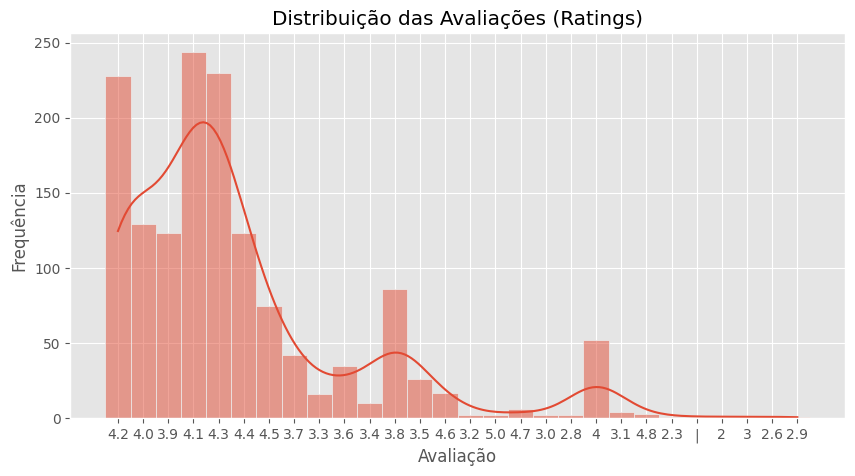

In [12]:
# 1. Distribuição de avaliações (rating)
plt.figure(figsize=(10, 5))
sns.histplot(data['rating'].dropna(), bins=20, kde=True)
plt.title('Distribuição das Avaliações (Ratings)')
plt.xlabel('Avaliação')
plt.ylabel('Frequência')
plt.show()

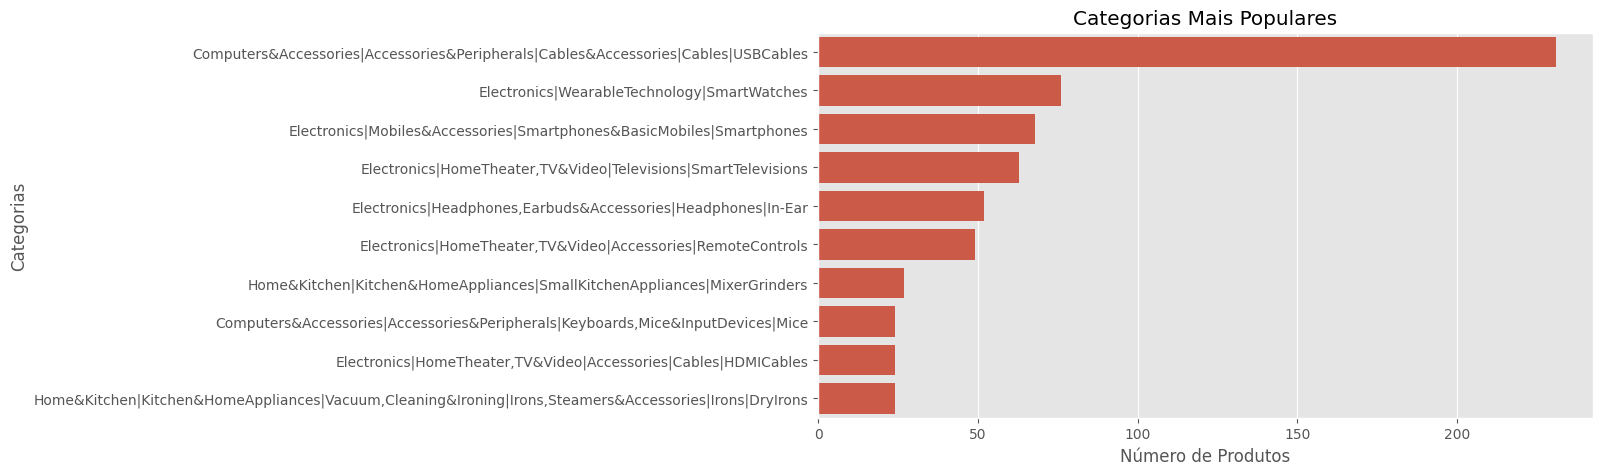

In [13]:
# 2. Categorias mais populares
plt.figure(figsize=(10, 5))
top_categories = data['category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Categorias Mais Populares')
plt.xlabel('Número de Produtos')
plt.ylabel('Categorias')
plt.show()

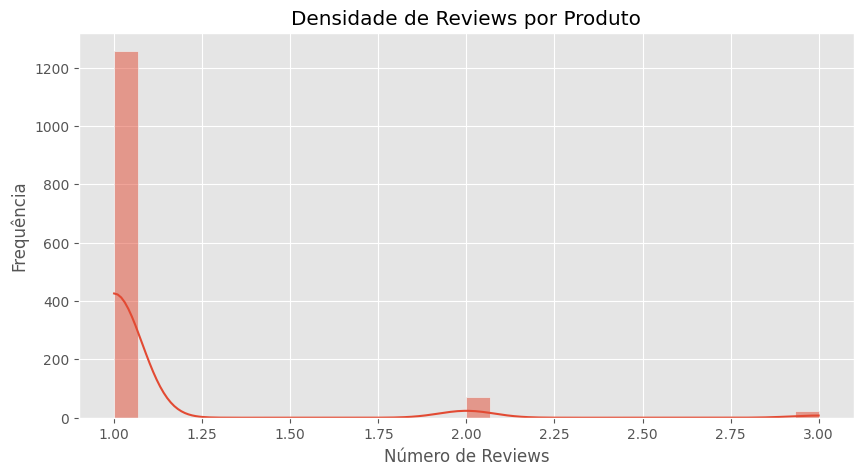

In [14]:
# 3. Densidade de reviews por produto
product_review_counts = data['product_id'].value_counts()
plt.figure(figsize=(10, 5))
sns.histplot(product_review_counts, bins=30, kde=True)
plt.title('Densidade de Reviews por Produto')
plt.xlabel('Número de Reviews')
plt.ylabel('Frequência')
plt.show()

In [15]:
# 4. Estatísticas descritivas dos preços
price_stats = data[['discounted_price', 'actual_price']].describe()
print("\nEstatísticas descritivas dos preços:")
display(price_stats)


Estatísticas descritivas dos preços:


,discounted_price,actual_price
count,1463.000000,1463.000000
mean,3129.277122,5451.068544
std,6948.222850,10881.018448
min,39.000000,39.000000
25%,325.000000,800.000000
50%,799.000000,1690.000000
75%,1999.000000,4312.500000
max,77990.000000,139900.000000


## **2. Desenvolvimento do Sistema de Recomendação**

Nesta etapa, implementamos um sistema de recomendação utilizando duas abordagens principais: **Filtragem Baseada em Conteúdo** e **Filtragem Colaborativa**.

---

### **2.1 Filtragem Baseada em Conteúdo**
A filtragem baseada em conteúdo utiliza informações sobre os produtos, como descrições, categorias e reviews, para encontrar similaridades e recomendar itens relacionados.

#### **Etapas Implementadas:**
1. **Pré-processamento dos textos:**
   - Remoção de stop words e lematização.
   - Conversão para minúsculas.
   - Vetorização dos textos utilizando **TF-IDF**.
2. **Cálculo de Similaridade:**
   - Utilizamos a similaridade do cosseno para medir o quão próximos os produtos são entre si.
3. **Recomendações Personalizadas:**
   - Para cada produto, recomendamos os itens mais semelhantes com base na descrição.

---

### **2.2 Filtragem Colaborativa**
A filtragem colaborativa baseia-se nas interações de usuários com produtos, como avaliações, para identificar padrões de comportamento e recomendar itens.

#### **Etapas Implementadas:**
1. **Criação de uma matriz de interações:**
   - Utilizamos `user_id` e `product_id` para criar uma matriz esparsa de interações.
2. **Fatoração Matricial:**
   - Utilizamos técnicas como Singular Value Decomposition (SVD) para fatorar a matriz e prever interações desconhecidas.
3. **Recomendações Personalizadas:**
   - Para cada usuário, geramos recomendações baseadas em produtos com alta probabilidade de interesse.

---

### **Resultados Esperados:**
1. Recomendações personalizadas para usuários com base no histórico de interações e similaridade entre produtos.
2. Insights sobre as características dos produtos mais relevantes para os usuários.

A seguir, implementamos o código correspondente a essas abordagens.


In [19]:
# Importação de bibliotecas adicionais
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds


#### **2.1 Filtragem Baseada em Conteúdo**

In [18]:
# Pré-processamento textual: combinando colunas textuais relevantes
data['combined_features'] = data['about_product'].fillna('') + ' ' + data['review_content'].fillna('') + ' ' + data['category']

# Vetorização TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(data['combined_features'])

# Cálculo da similaridade do cosseno
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Função para recomendar produtos com base na similaridade
def get_content_based_recommendations(product_id, cosine_sim=cosine_sim, data=data, top_n=5):
    idx = data[data['product_id'] == product_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]
    recommended_indices = [i[0] for i in sim_scores]
    return data.iloc[recommended_indices][['product_id', 'product_name', 'rating']]

# Exemplo de recomendação baseada em conteúdo
product_to_recommend = data['product_id'].iloc[0]
print(f"\nRecomendações para o produto '{data['product_name'].iloc[0]}':")
display(get_content_based_recommendations(product_to_recommend))




Recomendações para o produto 'Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)':


,product_id,product_name,rating
614,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2
369,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,4.2
220,B07JH1CBGW,Wayona Nylon Braided Usb Syncing And Charging ...,4.2
42,B07JW1Y6XV,Wayona Nylon Braided 3A Lightning to USB A Syn...,4.2
89,B07JH1C41D,Wayona Nylon Braided (2 Pack) Lightning Fast U...,4.2


#### **2.2 Filtragem Colaborativa**

In [30]:
# Criando a matriz de interações usuário-produto
interaction_matrix = data.pivot_table(index='user_id', columns='product_id', values='rating').fillna(0)

# Fatoração matricial com SVD
interaction_matrix_np = interaction_matrix.to_numpy()
user_ratings_mean = np.mean(interaction_matrix_np, axis=1)
interaction_matrix_demeaned = interaction_matrix_np - user_ratings_mean.reshape(-1, 1)
U, sigma, Vt = svds(interaction_matrix_demeaned, k=50)
sigma = np.diag(sigma)

# Reconstruindo a matriz de predição
predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
predicted_ratings_df = pd.DataFrame(predicted_ratings, columns=interaction_matrix.columns, index=interaction_matrix.index)

# Função para recomendar produtos com base na filtragem colaborativa
def get_collaborative_recommendations(user_id, predicted_ratings_df=predicted_ratings_df, top_n=5):
    user_ratings = predicted_ratings_df.loc[user_id].sort_values(ascending=False).head(top_n)
    return data[data['product_id'].isin(user_ratings.index)][['product_id', 'product_name', 'rating']]

# Exemplo de recomendação colaborativa
example_user = interaction_matrix.index[0]
print(f"\nRecomendações para o usuário '{example_user}':")
display(get_collaborative_recommendations(example_user))



Recomendações para o usuário 'AE22Y3KIS7SE6LI3HE2VS6WWPU4Q,AHWEYO2IJ5I5GDWZAHJK6NGYHFMA,AGYURQ3476BNT4D2O46THXEUY3SA,AFPMBSBIEX45OQ6UCQWPDG55GWLQ,AGWJU3WUQBDQYPSYAJSR3AKBLCOA,AEOVUNFCIFV223O536GVW5JHZKOA':


,product_id,product_name,rating
108,B0B9XLX8VR,VU 139 cm (55 inches) The GloLED Series 4K Sma...,4.3
168,B0B9959XF3,Acer 80 cm (32 inches) S Series HD Ready Andro...,4.3
184,B07CWNJLPC,AmazonBasics Double Braided Nylon USB Type-C t...,4.3
270,B0B997FBZT,Acer 139 cm (55 inches) H Series 4K Ultra HD A...,4.3
289,B07CWDX49D,AmazonBasics Double Braided Nylon USB Type-C t...,4.3


## **3. Discussão, Comparação e Conclusão**

Nesta etapa, analisamos as duas abordagens desenvolvidas para o sistema de recomendação: **Filtragem Baseada em Conteúdo** e **Filtragem Colaborativa**. Ambas as técnicas apresentam características específicas, com vantagens e limitações que as tornam adequadas para diferentes cenários.

---

### **3.1 Discussão das Abordagens**

#### **3.1.1 Filtragem Baseada em Conteúdo**
A Filtragem Baseada em Conteúdo utiliza atributos dos produtos, como descrições e categorias, para recomendar itens semelhantes àqueles que o usuário já demonstrou interesse.

##### **Vantagens:**
- **Personalização Direta:** Recomendação personalizada com base nos atributos específicos dos produtos.
- **Independência de Dados do Usuário:** Funciona bem mesmo sem histórico de interações de outros usuários.
- **Interpretabilidade:** É fácil justificar as recomendações com base nos atributos dos produtos.

##### **Limitações:**
- **Escopo Limitado:** Focado apenas em itens semelhantes, limitando a descoberta de novos produtos.
- **Dependência de Dados Textuais:** Dados inconsistentes ou mal estruturados podem prejudicar o desempenho.

---

#### **3.1.2 Filtragem Colaborativa**
A Filtragem Colaborativa se baseia no comportamento coletivo dos usuários, identificando padrões de interação entre usuários e produtos.

##### **Vantagens:**
- **Descoberta de Novos Produtos:** Recomendação de itens que o usuário talvez não conhecesse.
- **Uso de Dados Implícitos:** Funciona bem mesmo sem descrições detalhadas dos produtos.
- **Escalabilidade:** Ampla aplicação em grandes sistemas como Netflix e Amazon.

##### **Limitações:**
- **Problema de "Cold Start":** Depende de um número suficiente de interações para ser eficaz.
- **Sensibilidade a Dados Esparsos:** Pode ser prejudicado em cenários com poucas interações.
- **Baixa Interpretabilidade:** Difícil justificar recomendações feitas com base em padrões implícitos.

---

### **3.2 Comparação das Abordagens**

| **Critério**                    | **Filtragem Baseada em Conteúdo**                                      | **Filtragem Colaborativa**                              |
|----------------------------------|------------------------------------------------------------------------|---------------------------------------------------------|
| **Dependência de Dados**         | Depende das características dos produtos.                              | Depende de interações usuário-produto.                 |
| **Problema de "Cold Start"**     | Funciona bem para novos usuários, mas não para novos produtos.          | Problemas com novos usuários e produtos.               |
| **Diversidade de Recomendações** | Limitada a produtos semelhantes.                                       | Pode explorar produtos inesperados.                    |
| **Interpretabilidade**           | Alta, as recomendações podem ser explicadas com base nos atributos.     | Baixa, as recomendações dependem de padrões implícitos.|
| **Complexidade Computacional**   | Relativamente baixa para conjuntos de dados pequenos/médios.           | Alta, especialmente para grandes matrizes esparsas.    |
| **Escalabilidade**               | Boa para conjuntos de dados médios.                                    | Requer otimização para conjuntos de dados grandes.     |

---

### **3.3 Conclusão**

#### **Quando Utilizar Cada Abordagem**
- **Filtragem Baseada em Conteúdo:** Ideal para sistemas com dados ricos sobre os produtos e onde é necessário personalizar recomendações com base em preferências explícitas.
- **Filtragem Colaborativa:** Mais adequada para plataformas com muitas interações entre usuários e produtos, como serviços de streaming e e-commerce.

#### **Abordagem Combinada**
A combinação das duas técnicas em um sistema híbrido é amplamente utilizada, pois reúne o melhor de ambos os mundos:
- Recomendação de produtos semelhantes (baseado em conteúdo).
- Recomendação de produtos inesperados e novos (colaborativo).

#### **Aprendizados do Projeto**
1. A qualidade dos dados textuais foi determinante para o sucesso da Filtragem Baseada em Conteúdo.
2. A Filtragem Colaborativa demonstrou ser mais eficaz em capturar padrões complexos, mas foi limitada por dados esparsos.
3. A análise e o pré-processamento dos dados foram fundamentais para o desempenho de ambas as abordagens.

#### **Recomendações Futuras**
1. **Implementar uma abordagem híbrida:** Explorar os benefícios de combinar as duas técnicas para aumentar a precisão e a diversidade das recomendações.
2. **Melhorar os Dados Textuais:** Padronizar e enriquecer os atributos dos produtos para melhorar a qualidade das recomendações baseadas em conteúdo.
3. **Testar em Escala:** Avaliar o desempenho e a escalabilidade em conjuntos de dados maiores e mais diversos.

A escolha da abordagem ideal depende do objetivo do sistema e das características dos dados disponíveis. A integração de ambas as técnicas, ajustada às necessidades do contexto, pode oferecer uma experiência de recomendação superior aos usuários.
